# Import Data

For this purpose, this strategy will attemp to trade 3 instruments

1. AUDUSD H4 - Liquid, Low Volatility
1. AUDUSD D1 - Liquid, Low Volatility
1. EURUSD H4 - Liquid, Mid Volatility
1. EURUSD D1 - Liquid, Mid Volatility
1. GBPUSD H4 - Liquid, Extreme Volatility
1. GBPUSD D1 - Liquid, High Volatility
1. Wirdcard D1 - Illiquid, High Volatility

## AUDUSD D1


Plotting 240 results for trade days
LONG 2018-09-13 - 2018-09-14, Profit: $554.16 (-57.0 pips)
SHORT 2018-09-14 - 2018-09-17, Profit: $25.96 (-4.2 pips)
LONG 2018-09-17 - 2018-09-23, Profit: $258.35 (-27.4 pips)
SHORT 2018-09-23 - 2018-09-26, Profit: $149.56 (-16.6 pips)
LONG 2018-09-26 - 2018-09-27, Profit: $741.58 (-75.8 pips)
SHORT 2018-09-27 - 2018-09-30, Profit: $108.65 (-12.5 pips)
LONG 2018-09-30 - 2018-10-02, Profit: $496.18 (-51.2 pips)
SHORT 2018-10-02 - 2018-10-08, Profit: $267.53 (-28.4 pips)
LONG 2018-10-08 - 2018-10-10, Profit: $546.9 (-56.3 pips)
SHORT 2018-10-10 - 2018-10-11, Profit: $762.38 (-77.8 pips)
LONG 2018-10-11 - 2018-10-14, Profit: $68.38 (-8.4 pips)
SHORT 2018-10-14 - 2018-10-15, Profit: $434.39 (-45.0 pips)
LONG 2018-10-15 - 2018-10-17, Profit: $474.2 (-49.0 pips)
SHORT 2018-10-17 - 2018-10-19, Profit: $251.68 (-26.8 pips)
LONG 2018-10-19 - 2018-10-22, Profit: $476.06 (-49.2 pips)
SHORT 2018-10-22 - 2018-10-25, Profit: $0.0 (-21.2 pips)
CLOSE 2018-10-26
LONG

,timestamp,open,high,low,close,pre_close,p_change,pip_change,profit,slope,velocity,position
239,2018-09-13,0.7170,0.7229,0.7165,0.7191,0.7170,0.002929,29.288703,276.887029,0.00210,-0.003100,LONG
238,2018-09-14,0.7191,0.7216,0.7148,0.7150,0.7191,-0.005702,-57.015714,554.157141,-0.00100,-0.002075,SHORT
237,2018-09-16,0.7149,0.7159,0.7147,0.7150,0.7150,0.000000,0.000000,-16.000000,-0.00205,0.000575,SHORT
236,2018-09-17,0.7150,0.7197,0.7139,0.7153,0.7150,0.000420,4.195804,25.958042,0.00015,0.002975,LONG
235,2018-09-18,0.7153,0.7235,0.7141,0.7228,0.7153,0.010485,104.851111,1032.511114,0.00390,0.002550,LONG


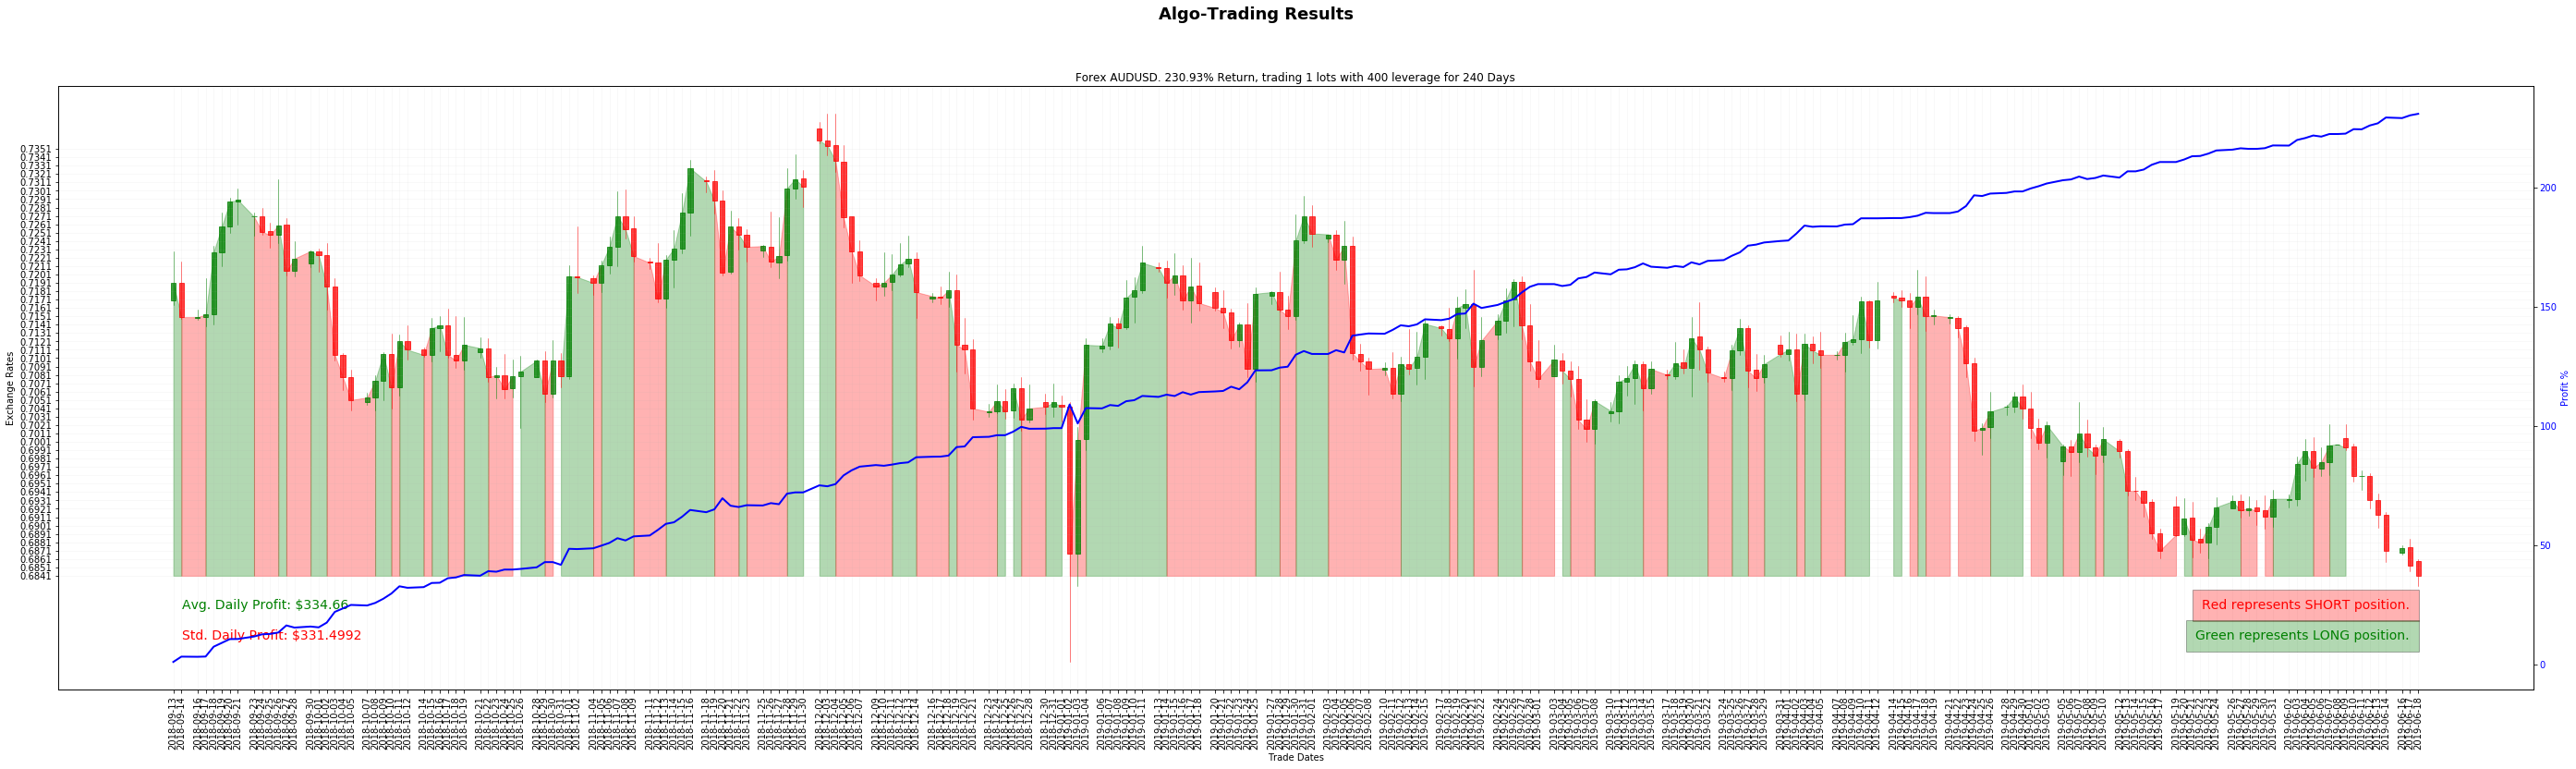

In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import import_ipynb
from strategy_sv import TradeStrategySV

forex_symbol = "AUDUSD"

forex_df = pd.read_csv('../../data/gen/{}_Daily_df.csv'.format(forex_symbol),
                       parse_dates=True,
                       index_col=0)
# Strip whitespace from column names
forex_df.columns = forex_df.columns.str.strip()

# Trading Parameters
lots = 1 
leverage = 400 # 400 Leverage
margin = 0.1 # 10% Margin Interest
pip_cost = 0.8 # Transaction Cost 0.8 pip
stop_loss = 2.0 # Stop Loss at 2.0 of standard deviation (so 5%)
one_trade_week = 5
one_trade_month = one_trade_week * 4
two_trade_month = one_trade_month * 2
three_trade_month = one_trade_month * 3
half_trade_year = three_trade_month * 2
one_trade_year = half_trade_year * 2

buy_slope_threshold = 0.00011578947368419412 
buy_velocity_threshold = -0.01695000000000002
close_slope_threshold = 0.017273684210526295
close_velocity_threshold = 0.018381578947368395
sell_slope_threshold = -0.00011578947368419412
sell_velocity_threshold = 0.01695000000000002 

# Initialize Strategy
strategy = TradeStrategySV(leverage=leverage,
                           margin=margin,
                           pip_cost=pip_cost,
                           buy_slope_threshold=buy_slope_threshold, 
                           buy_velocity_threshold=buy_velocity_threshold, 
                           close_slope_threshold=close_slope_threshold, 
                           close_velocity_threshold=close_velocity_threshold, 
                           sell_slope_threshold=sell_slope_threshold, 
                           sell_velocity_threshold=sell_velocity_threshold, 
                           should_log=True)
# backtest_df = forex_df[:one_trade_year]
forex_df = strategy.trade(data_df=forex_df, 
                          symbol=forex_symbol,
                          lots=lots,
                          stop_loss=stop_loss,)
test_df = forex_df[-one_trade_year:]
test_df = strategy.trade(data_df=test_df, 
                         symbol=forex_symbol,
                         lots=lots,
                         stop_loss=stop_loss,)

fig, axs = plt.subplots(figsize = (int(len(test_df.index)/5),12))

fig.suptitle('Algo-Trading Results', fontsize=18, fontweight='bold')
strategy.plot_trade(axs=axs)

fig.savefig('../gen/StrategySV_{}_Daily.png'.format(forex_symbol), dpi=150, bbox_inches="tight")

print("In the latest {} trading days, StrategySV resulted ${}, or {}%".format(len(test_df.index), round(strategy.trade_profit, 2), round(strategy.trade_profit/(lots * 100000 / leverage), 2)))

# Print
test_df.head()
